# Assignment 4

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [1]:
student = {
    'name' : "Esra" ,
    'surname' : "Sekerci", 
    'studentNumber' : "2698215"
}

print(student)

{'name': 'Esra', 'surname': 'Sekerci', 'studentNumber': '2698215'}


In [2]:
import numpy as np

## Notation for the homework

In this assignment, we consider neural network with multiple layers. Each layer has multiple inputs and outputs, and consists of two parts

- A linear module that implements the linear transformation $\pmb z = \pmb W^T x + \pmb w_0$. The output is $[z_1, \dots , z_n]^T$
- An **activation** module that applies some activation function $f$ to the linear module, such as Tanh or ReLU in the hidden layers or Softmax at the output layer. 


- Inputs to the vector $\pmb x$ is an $m \times 1$ vector
- Number of layers is $L$
- There are $n^l = m^{l+1}$ outputs from layer $l$
- The weight matrix for layer $l$ is $\pmb W^l$ is an $m^l \times n^l$ matrix
- Bias vector for layer $l$ is $\pmb w_0^l$ is a $n^l \times 1$ vector
- The outputs for the linear module for layer $l$ are known as *pre-activation* values denoted by $z^l$
- Layer $l$ activations are $a^l = [f^l(z_1^l), \dots, f^l(z_{n^l}^l)]^T$
- The output of the network is the values $a^L = [f^L(z_1^L), \dots, f^L(z_{n^L}^L)]^T$
- Loss function $Loss(a,y)$ measures the loss of output values $a$ when the target is $y$
  

## Sigmoid activation

Suppose you use *sigmoid* function as an activation function

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

- Write a function that computes the sigmoid function (5 pts)

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

- Write a function that computes the gradient of the sigmoid function with respect to $z$. (5 pts)

> **Hint:** check [here](https://www.mathsisfun.com/calculus/derivatives-rules.html) for derivative rules or google derivative of the sigmoid function.

In [4]:
def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

## Loss function for sigmoid activation

Recall from logistic regression that when using sigmoid activation for prediction, we label *positive points* as $+1$ and *negative points* as $0$.

A suitable loss function for sigmoid activation is the negative log-likelihood (NLL):

$$Loss(a,y) = NLL(a,y) = -(y \log a + (1-y) \log(1-a))$$

The objective function over $n$ data points can be computed as 

$$- \sum_{t=1}^n \left( y^{(t)} \log a^{(t)} + (1-y^{(t)}) \log(1-a^{(t)}) \right)$$

where $a^{(t)}$ is the model's output for training example $t$, and $y^{(t)}$ is the true label (1 or 0).

Consider a single unit with sigmoid activation trained to minimize NLL where $a_1^L = \sigma(\sum_k w^L_{k,1} x_k + w_{0,1}^L)$. In this case, we have $L=1$

Write an expression that computes the gradient of NLL with respect to weight vector $\nabla_{W^L}NLL(a_1^L, y)$ (5 pts)

> Note: you can check optimization week's notes or google for this gradient. Note that, there is no regularizer. 

In [5]:
def nll_gradient(x, a, y):
    diff = a - y  
    gradient = -np.dot(diff, x.T)
    return gradient

## Multi-class classification

When we have classify for more than two categories, we can use "one-hot" encoding of the output, and use a "**softmax**" (SM) activation module. 

Softmax activation module takes a pre-activation value for each predicted class, and it returns a vector representing a probability distribution for each output, where there is a probability value for $[0,1]$ for each class, and their sum is $1$. In other words, softmax takes all $n_L$ pre-activation values $z_j^L$ and returns $n_L$ output values $a_j^L \in [0,1]$ such that $\sum_j a_j^L=1$

The individual entries in softmax as computed as

$$a_j = \cfrac{e^{z_j}}{\sum_{k=1}^{n^L}e^{z_k}}$$

The relationship between the vector $a$ on the vectors $z$ is shown as 

$$a = SM(z)$$

A one-layer network with a linear module followed by a softmax activation is shown below:

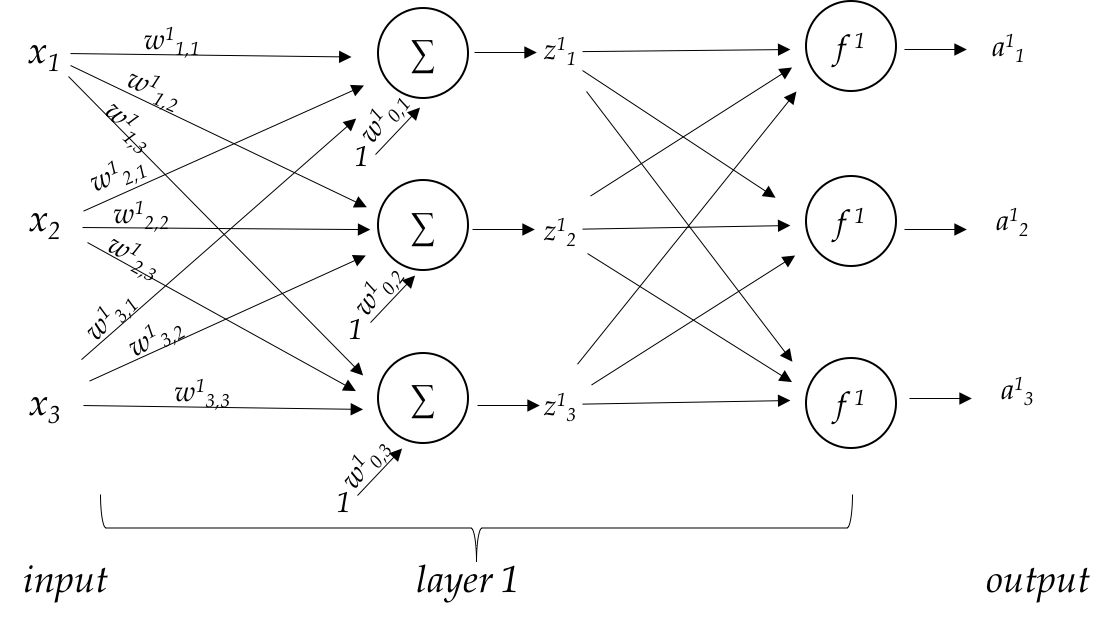

<!-- ![softmax](./softmax.png) -->

- Write a softmax function, which takes the input `z` a numpy array of pre-activations, and returns a numpy array of softmax activations (7.5 pts)

In [6]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

For multiclass predictions, we need a loss function $Loss(a,y)$ where $a$ is the discrete probability distribution (obtained from softmax) and $y$ is a one-hot encoding of a single output value. NLL could be extended to NLL multi class (NLLM) for this as follows

$$NLLK(a,y) = - \sum_{j=1}^{n^L} y_j \log a_j^L$$

For example, if $a = [0.1, 0.4, 0.5]^T$ and $y= [1,0,0]$ then 

$$NLLK = - (1 \times \log(0.1) + 0 \times \log(0.4) + 0 \times \log(0.5)) = -  \log(0.1) = 2.3$$

- Write a multiclass negative log likelihood function that receives the inputs (as numpy arrays)
  - `a` activations from softmax
  - `y` one-hot encoding of the true data value

and returns $NLLM(a,y)$ (7.5 pts)

In [7]:
def nllm(a, y):
    return -np.sum(y * np.log(a.T))

In [8]:
a = np.array([[0.1, 0.4, 0.5]]).T
y = np.array([[1, 0, 0]])
nllm(a,y)

2.3025850929940455

Consider a single layer with a softmax actiation, trained to minimize NLL. The pre-activation values are

$$z_j^L = \sum_k w_{k,j}^L x_k + w_{0,j}^L$$

and activation is $a^L = SM(z^L)$

For gradient descent, we need $\frac{\partial}{\partial w_{k,j}^L} NLLM(a^L, y)$. This has a nice form:

$$\frac{\partial}{\partial w_{k,j}^L} NLLM(a^L, y) = x_k (a_j^L - y_j)$$

Suppose you have two input units and three possible output values. Suppose th weight matrix $W^L$ is 

$$W^L = \begin{bmatrix} 1 & -1 & -2 \\ -1 & 2 & 1 \end{bmatrix}$$
:
Assume the biases are zero, the input is $x= [1,1]^T$ and the target output is $y = [0,1,0]^T$. What is the matrix $\nabla_{W^L}NLLM(a^L,y)$? (7.5 pts)

In [9]:
w = np.array([[1, -1, -2],[-1, 2, 1]])
x = np.array([[1,1]]).T
y = np.array([[0,1,0]]).T

a = softmax(np.dot(w.T, x))
nllm_grad = nll_gradient(x, a, y)

In [10]:
nllm_grad

array([[-0.24472847, -0.24472847],
       [ 0.33475904,  0.33475904],
       [-0.09003057, -0.09003057]])

What is the predicted probability that $x$ is in class 2, before any gradient updates? (assume classes 0, 1 and 2) (5 pts)

In [11]:
prob_class_2 = a[2] 

In [12]:
prob_class_2

array([0.09003057])

Using step size $0.5$ what is $W^L$ after one gradient update step (7.5 pts)

In [13]:
learning_rate = 0.5
w = w - learning_rate * nllm_grad.T

In [14]:
w

array([[ 1.12236424, -1.16737952, -1.95498471],
       [-0.87763576,  1.83262048,  1.04501529]])

What is the predicted probability that $x$ is in class 2, after the gradient update? (5 pts)

In [15]:
a_updated = softmax(np.dot(w.T, x))
prob_class_2_updated = a_updated[2]

In [16]:
prob_class_2_updated

array([0.1110516])

## Neural Network

Consider the neural network in the figure below with RelU activations on hidden neurons ($f^1$) and softmax activation for the output layer ($f^2$), resulting in softmax outputs ($a_1^2$ and $a_2^2$).

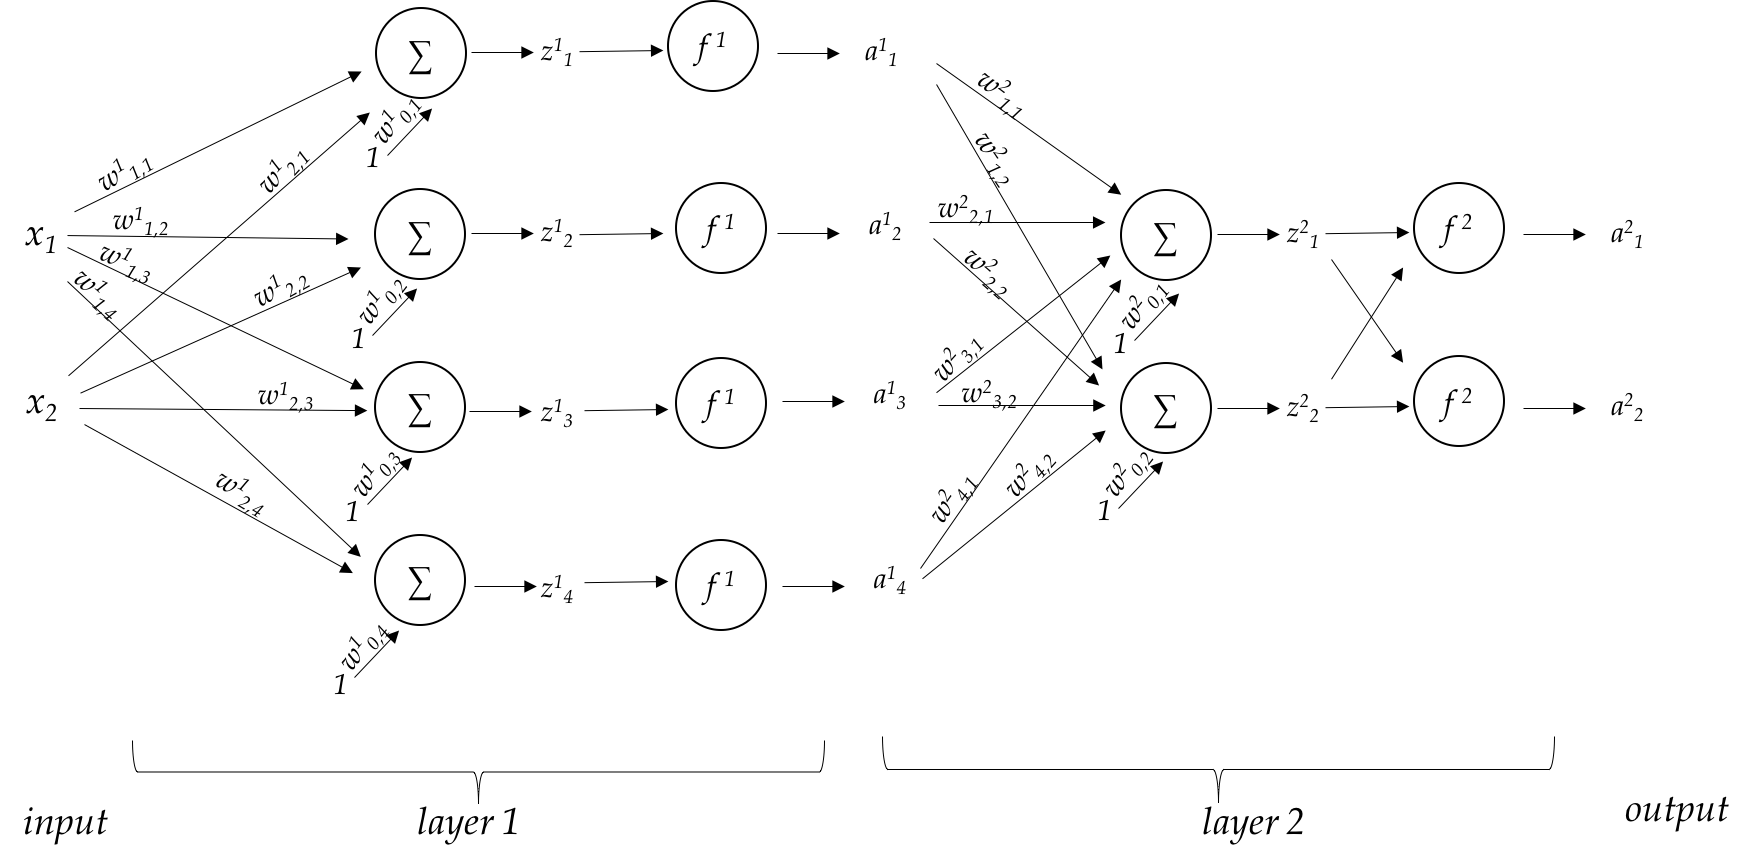
<!-- ![](./nnet.png) -->

Given an input $x = [x_1, x_2]^T$, the hidden units in the network are activated as follows

$$\begin{align*} &z_1^1 = x_1 w_{1,1}^1 + x_2 w_{2,1}^1 + w_{0,1}^1 \qquad  & a_1^1 = \max\{z_1^1,0\}
\\
&z_2^1 = x_1 w_{1,2}^1 + x_2 w_{2,2}^1 + w_{0,2}^1 \qquad  & a_2^1 = \max\{z_2^1,0\}
\\
&z_3^1 = x_1 w_{1,3}^1 + x_2 w_{2,3}^1 + w_{0,3}^1 \qquad  & a_3^1 = \max\{z_3^1,0\}
\\
&z_4^1 = x_1 w_{1,4}^1 + x_2 w_{2,4}^1 + w_{0,4}^1 \qquad  & a_4^1 = \max\{z_4^1,0\}
\\\ \\
&z_1^2 = a_1^1 w_{1,1}^2 + a_2^1 w_{2,1}^2 + a_3^1 w_{3,1}^2 + a_4^1 w_{4,1}^2 + w_{0,1}^2
\\
&z_2^2 = a_1^1 w_{1,2}^2 + a_2^1 w_{2,2}^2 + a_3^1 w_{3,2}^2 + a_4^1 w_{4,2}^2 + w_{0,2}^2 \end{align*}$$

The final output is obtained by applying *softmax* to the last hidden layer

$$
a_1^2 = \frac{e^{z_1^2}}{e^{z_1^2} + e^{z_2^2}}
\\
a_2^2 = \frac{e^{z_2^2}}{e^{z_1^2} + e^{z_2^2}}
$$

Suppose the parameters of the model is as follows

$$
\begin{align*}
\begin{bmatrix}
w_{1,1}^1 & w_{1,2}^1 & w_{1,3}^1 & w_{1,4}^1 \\
w_{2,1}^1 & w_{2,2}^1 & w_{2,3}^1 & w_{2,4}^1 
\end{bmatrix} &= 
\begin{bmatrix}
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix},
\qquad
&\begin{bmatrix}
w_{0,1}^1 \\
w_{0,2}^1 \\
w_{0,3}^1 \\
w_{0,4}^1 \\
\end{bmatrix} = 
\begin{bmatrix}
-1 \\ -1 \\ -1 \\ -1
\end{bmatrix}
\\\ \\
\begin{bmatrix}
w_{1,1}^2 & w_{1,2}^2 \\
w_{2,1}^2 & w_{2,2}^2 \\ 
w_{3,1}^2 & w_{3,2}^2 \\
w_{4,1}^2 & w_{4,2}^2 
\end{bmatrix} &= 
\begin{bmatrix}
1 & -1 \\
1 & -1 \\
1 & -1 \\
1 & -1
\end{bmatrix},
\qquad
&\begin{bmatrix}
w_{0,1}^2 \\
w_{0,2}^2
\end{bmatrix} = 
\begin{bmatrix}
0 \\
2
\end{bmatrix}
\end{align*}
$$

In [17]:
# layer 1 weights
w_1 = np.array([[1, 0, -1, 0], [0, 1, 0, -1]])
w_1_bias = np.array([[-1, -1, -1, -1]]).T
# layer 2 weights
w_2 = np.array([[1, -1], [1, -1], [1, -1], [1, -1]])
w_2_bias = np.array([[0, 2]]).T

Consider the input $x_1 = 4, x_2 = 11$ what are the outputs for the hidden units $f^1(z_1^1), f^1(z_2^1), f^1(z_3^1), f^1(z_4^1)$ (10 pts)

> Note you may need to implement a relu function for this.

In [18]:
x = np.array([[4,11]]).T

def relu(z):
    return np.maximum(0, z)

z_1_1 = x[0] * w_1[0, 0] + x[1] * w_1[1, 0] + w_1_bias[0, 0]
z_2_1 = x[0] * w_1[0, 1] + x[1] * w_1[1, 1] + w_1_bias[1, 0]
z_3_1 = x[0] * w_1[0, 2] + x[1] * w_1[1, 2] + w_1_bias[2, 0]
z_4_1 = x[0] * w_1[0, 3] + x[1] * w_1[1, 3] + w_1_bias[3, 0]

a_1_1 = relu(z_1_1)
a_2_1 = relu(z_2_1)
a_3_1 = relu(z_3_1)
a_4_1 = relu(z_4_1)

a_1_1, a_2_1, a_3_1, a_4_1

(array([3]), array([10]), array([0]), array([0]))

In [19]:
a_1 = np.array([a_1_1, a_2_1, a_3_1, a_4_1])

What is the final output $(a_1^2, a_2^2)$ of the network (10 pts)

In [20]:
z_1_2 = a_1_1 * w_2[0, 0] + a_2_1 * w_2[1, 0] + a_3_1 * w_2[2, 0] + a_4_1 * w_2[3, 0] + w_2_bias[0, 0]
z_2_2 = a_1_1 * w_2[0, 1] + a_2_1 * w_2[1, 1] + a_3_1 * w_2[2, 1] + a_4_1 * w_2[3, 1] + w_2_bias[1, 0]

# Apply softmax activation function for layer 2
a_1_2 = np.exp(z_1_2) / (np.exp(z_1_2) + np.exp(z_2_2))
a_2_2 = np.exp(z_2_2) / (np.exp(z_1_2) + np.exp(z_2_2))

a_1_2, a_2_2

(array([1.]), array([3.77513454e-11]))

## Backpropagation

Suppose the output values for this input is $[0,1]$

In [21]:
y = np.array([[0,1]]).T

- Compute the gradients for the final layer ($W^2$) and update the weights using a gradient descent step with learning rate 0.5. (10 pts)

Note that the gradient for the weights are

$$\frac{\partial loss}{\partial W^l} = \frac{\partial loss}{\partial z^l} \frac{\partial z^l}{\partial W^l}$$

And since  $\pmb z^L = W^{L\ T} \cdot \pmb a^{L-1}$



$$\frac{\partial z^l}{\partial W^l} = \pmb a^{L-1}$$

So 

$$\frac{\partial loss}{\partial W^l} = \frac{\partial loss}{\partial z^l} \pmb a^{L-1}$$

Also note that the loss function is NLL, so $\frac{\partial Loss}{\partial z^L}$ = $a^L - y$

> Match the  dimensions for matrix products


Finally, the gradient update is

$W^l = W^l - \alpha \frac{\partial Loss}{\partial W^l}$ where $\alpha$ is the learning rate

> You do not need to update the bias terms `w_2_bias`, only do it for `w_2`



In [22]:
dL_dz2_a1 = a_1_2 - y[0]
dL_dz2_a2 = a_2_2 - y[1]
dL_dz2 = np.array([dL_dz2_a1, dL_dz2_a2])

nllm_grad_w2 = np.dot(a_1, dL_dz2.T)

alpha = 0.5
w_2_updated = w_2 - alpha * nllm_grad_w2
w_2 = w_2_updated
w_2

array([[-0.5,  0.5],
       [-4. ,  4. ],
       [ 1. , -1. ],
       [ 1. , -1. ]])

- Compute the weights for the first layer ($W^1$) and update the first layer's weights using a learning rate of 0.5. (10 pts)

Note that gradient for the weights are

$$\frac{\partial Loss}{\partial W^{1}}=\frac{\partial Loss}{\partial z^2} \frac{\partial z^2}{\partial a^{1}}\frac{\partial a^{1}}{\partial z^{1}}\frac{\partial z^{1}}{\partial W^{1}}$$

and $\frac{\partial z^{1}}{\partial W^{1}} = x$ so 

$$\frac{\partial Loss}{\partial W^{1}}=\frac{\partial Loss}{\partial z^2} \frac{\partial z^2}{\partial a^{1}}\frac{\partial a^{1}}{\partial z^{1}}x$$

Note that 

- $z^l = W^l a^l{l-1} + w_0^l$ so $\partial z^l / \partial a^{l-1} = W^l$ (i.e. $\partial z^2 / \partial a^{1} = W^2$)
- first layer has a relu activation function $\partial a^1 / \partial z^1 = 1$ if $z>0$ and $0$ otherwise.

> Note: Match dimensions \
> You do not need to update the bias terms `w_1_bias`, only do it for `w_1`

In [23]:
dL_dw1=np.dot(dL_dz2,np.dot(w_2, x).T)
w_1_updated = np.zeros([2, 4])


if z_1_1>0:
    w_1_updated[0,0] = w_1[0,0] - alpha * dL_dw1[0,0]
    w_1_updated[1,0] = w_1[1,0] - alpha * dL_dw1[1,0]
else:
    w_1_updated[0,0] = w_1[0,0]
    w_1_updated[1,0] = w_1[1,0]

if z_2_1>0:
    w_1_updated[0,1] = w_1[0,1] - alpha * dL_dw1[0,1]
    w_1_updated[1,1] = w_1[1,1] - alpha * dL_dw1[1,1]
else:
    w_1_updated[0,1] = w_1[0,1]
    w_1_updated[1,1] = w_1[1,1]

if z_3_1>0:
    w_1_updated[0,2] = w_1[0,2] - alpha * dL_dw1[0,2]
    w_1_updated[1,2] = w_1[1,2] - alpha * dL_dw1[1,2]
else:
    w_1_updated[0,2] = w_1[0,2]
    w_1_updated[1,2] = w_1[1,2]

if z_4_1>0:
    w_1_updated[0,3] = w_1[0,3] - alpha * dL_dw1[0,3]
    w_1_updated[1,3] = w_1[1,3] - alpha * dL_dw1[1,3]
else:
    w_1_updated[0,3] = w_1[0,3]
    w_1_updated[1,3] = w_1[1,3]

w_1 = w_1_updated
w_1

array([[ -0.75, -14.  ,  -1.  ,   0.  ],
       [  1.75,  15.  ,   0.  ,  -1.  ]])

Compute the final output $(a_1^2, a_2^2)$ of the network with the new weights updated with backpropagation (5 pts)

In [24]:
def relu(z):
    return np.maximum(0, z)
z_1_1 = x[0] * w_1[0, 0] + x[1] * w_1[1, 0] + w_1_bias[0, 0]
z_2_1 = x[0] * w_1[0, 1] + x[1] * w_1[1, 1] + w_1_bias[1, 0]
z_3_1 = x[0] * w_1[0, 2] + x[1] * w_1[1, 2] + w_1_bias[2, 0]
z_4_1 = x[0] * w_1[0, 3] + x[1] * w_1[1, 3] + w_1_bias[3, 0]

a_1_1 = relu(z_1_1)
a_2_1 = relu(z_2_1)
a_3_1 = relu(z_3_1)
a_4_1 = relu(z_4_1)

a_1_1, a_2_1, a_3_1, a_4_1

(array([15.25]), array([107.99999999]), array([0.]), array([0.]))

In [25]:
z_1_2 = a_1_1 * w_2[0, 0] + a_2_1 * w_2[1, 0] + a_3_1 * w_2[2, 0] + a_4_1 * w_2[3, 0] + w_2_bias[0, 0]
z_2_2 = a_1_1 * w_2[0, 1] + a_2_1 * w_2[1, 1] + a_3_1 * w_2[2, 1] + a_4_1 * w_2[3, 1] + w_2_bias[1, 0]

# Apply softmax activation function for layer 2
a_1_2 = np.exp(z_1_2) / (np.exp(z_1_2) + np.exp(z_2_2))
a_2_2 = np.exp(z_2_2) / (np.exp(z_1_2) + np.exp(z_2_2))

a_1_2, a_2_2

(array([0.]), array([1.]))